In [1]:
import keras
import tensorflow as tf

Using TensorFlow backend.


## Loading Data

In [1]:
from keras.datasets import mnist

(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
print(xtest.shape)

Using TensorFlow backend.


(10000, 28, 28)


## Getting Random Image

In [11]:
import cv2
import numpy as np

for i in range(0,6):
    randomnum=np.random.randint(0,len(xtrain))
    img = xtrain[randomnum]
    name = 'random image ' +str(i)
    cv2.imshow(name,img)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

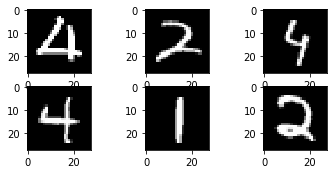

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplot(331)
randnum = np.random.randint(0,len(xtrain))
plt.imshow(xtrain[randnum],cmap = plt.get_cmap('gray'))

plt.subplot(332)
randnum = np.random.randint(0,len(xtrain))
plt.imshow(xtrain[randnum],cmap = plt.get_cmap('gray'))


plt.subplot(333)
randnum = np.random.randint(0,len(xtrain))
plt.imshow(xtrain[randnum],cmap = plt.get_cmap('gray'))


plt.subplot(334)
randnum = np.random.randint(0,len(xtrain))
plt.imshow(xtrain[randnum],cmap = plt.get_cmap('gray'))


plt.subplot(335)
randnum = np.random.randint(0,len(xtrain))
plt.imshow(xtrain[randnum],cmap = plt.get_cmap('gray'))


plt.subplot(336)
randnum = np.random.randint(0,len(xtrain))
plt.imshow(xtrain[randnum],cmap = plt.get_cmap('gray'))

plt.show()

## shaping the data

In [2]:
data = xtrain.shape[0]
data1 = xtest.shape[0]
img_rows = xtrain.shape[1]
img_col = xtrain.shape[2]

In [3]:
x_train = xtrain.reshape(data,img_rows,img_col,1)
x_test = xtest.reshape(data1,img_rows,img_col,1)

input_shape = (img_rows,img_col,1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /=255
x_test /=255

print(x_test.shape)

(10000, 28, 28, 1)


## One hot encoding

In [4]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(ytrain)
y_test = np_utils.to_categorical(ytest)

classes = y_train.shape[1]
piixels = x_train.shape[1] * x_test.shape[2]

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## CNN Model

In [7]:
import keras
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D,Dense, Dropout,Flatten
from keras import backend as k
from keras.optimizers import SGD


model = Sequential()
model.add(Conv2D(32,(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)             

## Train Our Model

In [8]:
print(y_train.shape,y_test.shape)

(60000, 10) (10000, 10)


In [9]:
training = model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_test,y_test))
score = model.evaluate(x_test,y_test,verbose=0)
print('loss= ', score[0])
print('accuracy= ',score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 197s 3ms/step - loss: 0.5929 - accuracy: 0.8142 - val_loss: 0.2022 - val_accuracy: 0.9416
Epoch 2/10
60000/60000 [==============================] - 190s 3ms/step - loss: 0.3003 - accuracy: 0.9095 - val_loss: 0.1465 - val_accuracy: 0.9558
Epoch 3/10
60000/60000 [==============================] - 203s 3ms/step - loss: 0.2395 - accuracy: 0.9277 - val_loss: 0.1175 - val_accuracy: 0.9642
Epoch 4/10
60000/60000 [==============================] - 229s 4ms/step - loss: 0.1951 - accuracy: 0.9423 - val_loss: 0.0956 - val_accuracy: 0.9682
Epoch 5/10
60000/60000 [==============================] - 216s 4ms/step - loss: 0.1634 - accuracy: 0.9517 - val_loss: 0.0754 - val_accuracy: 0.9767
Epoch 6/10
60000/60000 [==============================] - 193s 3ms/step - loss: 0.1391 - accuracy: 0.9582 - val_loss: 0.0644 - val_accuracy: 0.9794
Epoch 7/10
60000/60000 [==============================] - 194

## Plotting Accuracy and Loss

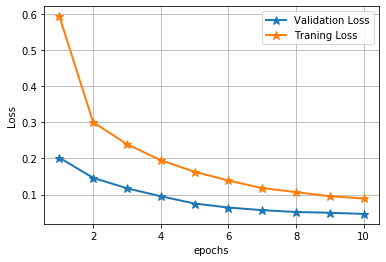

In [12]:
import matplotlib.pyplot as plt

training_dict = training.history

loss_values = training_dict['loss']
val_loss_values = training_dict['val_loss']
epochs = range(1,len(loss_values)+1)

line1 = plt.plot(epochs,val_loss_values,label='Validation Loss')
line2 = plt.plot(epochs,loss_values,label='Traning Loss')
plt.setp(line1,linewidth=2, marker='*',markersize=9)
plt.setp(line2,linewidth=2, marker='*',markersize=9)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

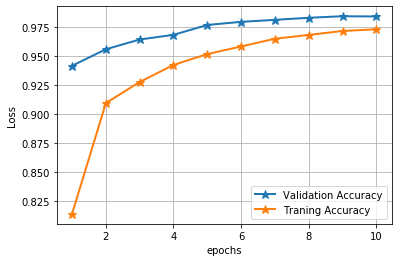

In [13]:
import matplotlib.pyplot as plt

training_dict = training.history

loss_values = training_dict['accuracy']
val_loss_values = training_dict['val_accuracy']
epochs = range(1,len(loss_values)+1)

line1 = plt.plot(epochs,val_loss_values,label='Validation Accuracy')
line2 = plt.plot(epochs,loss_values,label='Traning Accuracy')
plt.setp(line1,linewidth=2, marker='*',markersize=9)
plt.setp(line2,linewidth=2, marker='*',markersize=9)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

## Saving and loading the model

In [14]:
model.save("D:/Yolo/CNN/digits.h5")

In [10]:
from keras.models import load_model
classifier = load_model("D:/Yolo/CNN/digits.h5")
print('s')


s


In [11]:
import cv2
import numpy as np

def draw_number(name,res,inp_img):
    black = [0,0,0]
    exp_img = cv2.copyMakeBorder(inp_img,0,0,0,imagel.shape[0],cv2.BORDER_CONSTANT,value=black)
    exp_img = cv2.cvtColor(exp_img,cv2.COLOR_GRAY2BGR)
    cv2.putText(exp_img,str(res),(152,70),cv2.FONT_HERSHEY_COMPLEX_SMALL,4,(0,255,0),2)
    cv2.imshow(name,exp_img)
    
    
for i in range(0,7):
    rand = np.random.randint(0,len(x_test))
    inp_img = x_test[rand]
    
    imagel=cv2.resize(inp_img,None,fx=4,fy=4,interpolation=cv2.INTER_CUBIC)
    inp_img = inp_img.reshape(1,28,28,1)
    res = str(classifier.predict_classes(inp_img,1,verbose=0)[0])
    
    draw_number('prediction',res,imagel)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()